# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error


# Reading CSV

In [2]:
listing_summary = pd.read_csv(r"C:\Users\Germán\Github\Project_Airbnb\Data\listings_summary.csv")
listing_summary.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [3]:
listing_complete = pd.read_csv(r"C:\Users\Germán\Github\Project_Airbnb\Data\listings.csv")
listing_complete.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
listing_complete.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,831713,https://www.airbnb.com/rooms/831713,20240913025629,2024-09-13,city scrape,645 sq ft (60m²) apartment downtown lyon 2BR...,Apartment located in Saint-Just up the hill of...,NaN,https://a0.muscache.com/pictures/12333829/0f9e...,4355017,...,4.89,4.75,4.72,6938513291736,f,1,1,0,0,0.38


## URL

In [5]:
print(listing_complete[listing_complete['id'] == 18849260])

            id                            listing_url       scrape_id  \
2254  18849260  https://www.airbnb.com/rooms/18849260  20240913025629   

     last_scraped       source  \
2254   2024-09-13  city scrape   

                                                   name  \
2254  Maison de ville du XVIIIe siècle , piscine Lyon 9   

                                            description  \
2254  Beautiful character house dating back to the 1...   

                                  neighborhood_overview  \
2254  Beautiful character house dating back to the 1...   

                                            picture_url  host_id  ...  \
2254  https://a0.muscache.com/pictures/07b9e365-30e0...  5624571  ...   

     review_scores_communication review_scores_location review_scores_value  \
2254                        4.93                   4.74                4.71   

            license instant_bookable calculated_host_listings_count  \
2254  6938912678348                f              

In [6]:
#Mostrar price de id = x
print(listing_summary[listing_summary['id'] == 28169625]['price'])

3362   NaN
Name: price, dtype: float64


# Chosing columns

In [7]:
#Vamos a definir que variables se van a quedar en el dataset
df = listing_complete[["id","host_id","host_since","host_is_superhost",'neighbourhood_cleansed',"latitude","longitude","room_type","accommodates","bathrooms_text",'amenities','price','minimum_nights', 'maximum_nights','availability_365','number_of_reviews_ltm','last_review','review_scores_rating','license',"bedrooms"]]

In [8]:
df.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews_ltm', 'last_review', 'review_scores_rating',
       'license', 'bedrooms'],
      dtype='object')

In [9]:
df.shape

(9738, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9738 entries, 0 to 9737
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9738 non-null   int64  
 1   host_id                 9738 non-null   int64  
 2   host_since              9736 non-null   object 
 3   host_is_superhost       9592 non-null   object 
 4   neighbourhood_cleansed  9738 non-null   object 
 5   latitude                9738 non-null   float64
 6   longitude               9738 non-null   float64
 7   room_type               9738 non-null   object 
 8   accommodates            9738 non-null   int64  
 9   bathrooms_text          9734 non-null   object 
 10  amenities               9738 non-null   object 
 11  price                   5296 non-null   object 
 12  minimum_nights          9738 non-null   int64  
 13  maximum_nights          9738 non-null   int64  
 14  availability_365        9738 non-null   

In [11]:
df.duplicated().sum()

np.int64(0)

# Changing types

In [12]:
#Cambiamos a formato fecha host_since y last_review
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])

#Cambiar formato precio a float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\3238221776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_since'] = pd.to_datetime(df['host_since'])
C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\3238221776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = pd.to_datetime(df['last_review'])
C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\3238221776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

# Data preprocesing

## Nulls

In [13]:
df.isnull().sum()/df.shape[0]*100

id                         0.000000
host_id                    0.000000
host_since                 0.020538
host_is_superhost          1.499281
neighbourhood_cleansed     0.000000
latitude                   0.000000
longitude                  0.000000
room_type                  0.000000
accommodates               0.000000
bathrooms_text             0.041076
amenities                  0.000000
price                     45.615116
minimum_nights             0.000000
maximum_nights             0.000000
availability_365           0.000000
number_of_reviews_ltm      0.000000
last_review               18.658862
review_scores_rating      18.658862
license                   41.045389
bedrooms                  14.356131
dtype: float64

In [14]:
#Dropeamos nulls de host_since y host_listings_count
df = df.dropna(subset=['host_since',"bathrooms_text","last_review","review_scores_rating"])

In [15]:
# Corregimos host_is_superhost por su moda la cuál sabemos que es 'f' de falso
df['host_is_superhost'] = df['host_is_superhost'].fillna('f')


### License column

In [16]:
# Primero reemplazamos los valores numéricos con "licensed" y dejamos los demás como están
df['license'] = df['license'].apply(lambda x: 'Licensed' if str(x).isdigit() else x)

In [17]:
# Aquí reemplazamos para acortar el texto
df['license'] = df['license'].replace({
    'Available with a mobility lease only ("bail mobilité")': 'Mobility lease only',
    'Exempt - hotel-type listing': 'Exempt',"dispensé" : "Exempt"})


In [18]:
# Convertimos a "licensed" los valores no nulos que no sean "Mobility lease only" o "Exempt"
df['license'] = df['license'].apply(
    lambda x: 'licensed' if pd.notnull(x) and x not in ['Mobility lease only', 'Exempt'] else x
)

In [19]:
# Por último reemplazamos los nulos por "Unlicensed"
df['license'] = df['license'].fillna('Unlicensed')

In [20]:
#Contamos cuantos Valores unicos hay en license
df['license'].value_counts()

license
licensed               4796
Unlicensed             2740
Exempt                  227
Mobility lease only     157
Name: count, dtype: int64

### Bedrooms (KNN)

In [21]:
# Para calcular los nulos en bedrooms, hare un knn imputer
df_beds_accomodates = df[['bedrooms', 'accommodates']]

df_with_beds = df_beds_accomodates.dropna(subset=['bedrooms'])
df_without_beds = df_beds_accomodates[df_beds_accomodates['bedrooms'].isna()]


x_train, x_test, y_train, y_test = train_test_split(df_with_beds.drop(columns="bedrooms"), df_with_beds["bedrooms"], test_size=0.2, random_state=42)


scores = [-0.61261261 -1.18018018 -0.95135135 -0.53873874 -0.5009009  -0.4018018
 -0.52432432 -0.54414414 -0.42418773 -0.52166065]
scores = [-0.43693694 -0.91711712 -0.55405405 -0.37252252 -0.30540541 -0.34594595
 -0.38648649 -0.30810811 -0.37048736 -0.39034296]
scores = [-0.45465465 -0.87227227 -0.43263263 -0.35655656 -0.30970971 -0.37517518
 -0.37017017 -0.32412412 -0.3674288  -0.34977938]
scores = [-0.42815315 -0.75315315 -0.36869369 -0.30822072 -0.32398649 -0.31193694
 -0.36418919 -0.32781532 -0.38955325 -0.30403881]
scores = [-0.42724324 -0.70825225 -0.36072072 -0.3045045  -0.3372973  -0.30032432
 -0.39084685 -0.31495495 -0.38527076 -0.31768953]
scores = [-0.39684685 -0.698999   -0.34454454 -0.3021021  -0.30275275 -0.29309309
 -0.37132132 -0.30685686 -0.34897714 -0.31869234]
scores = [-0.38709322 -0.71046148 -0.34671815 -0.3009009  -0.28063982 -0.30854937
 -0.3614635  -0.30494576 -0.33736094 -0.32667796]


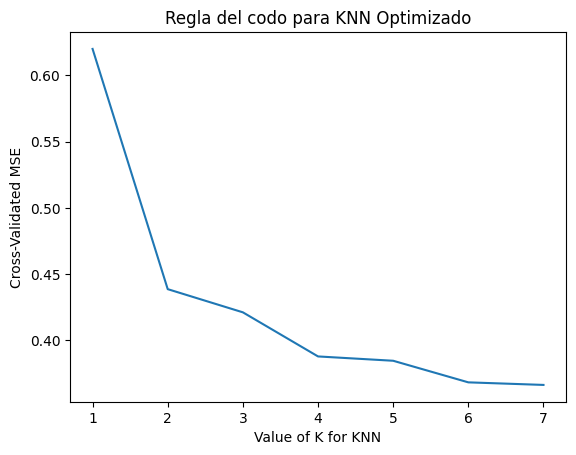

In [22]:
mse = []
k_range = range(1, 8)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    mse.append(abs(scores.mean()))
    print(f"scores = {scores}")

plt.plot(k_range, mse)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.title('Regla del codo para KNN Optimizado')
plt.show()


In [23]:
#Creamos el regresor para predecir los valores que nos faltaban de bedrooms 
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(df_without_beds.drop(columns='bedrooms'))
df_without_beds['bedrooms'] = y_pred

#Traspasamos los valores predichos al dataset original
df.loc[df['bedrooms'].isna(), 'bedrooms'] = df_without_beds['bedrooms']


C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\1125958775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_beds['bedrooms'] = y_pred


In [24]:
df.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews_ltm', 'last_review', 'review_scores_rating',
       'license', 'bedrooms'],
      dtype='object')

In [25]:
df.shape

(7920, 20)

### Merging csv to fix price

In [26]:
calendar_df =  pd.read_csv(r"C:\Users\Germán\Github\Project_Airbnb\Data\calendar.csv")

In [27]:
calendar_df.head(1)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,56766,2024-09-13,f,$130.00,NaN,30,1125


In [28]:
calendar_df['listing_id'].nunique()

9738

In [29]:
calendar_df.isnull().sum()

listing_id              0
date                    0
available               0
price                   0
adjusted_price    3554304
minimum_nights          0
maximum_nights          0
dtype: int64

In [30]:
calendar_df.duplicated().sum()

np.int64(0)

In [31]:
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\668216433.py:1: SyntaxWarning: invalid escape sequence '\$'
  calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)


In [32]:
ids_precios_cero = calendar_df.groupby('listing_id')['price'].sum().reset_index()
ids_precios_cero = ids_precios_cero[ids_precios_cero['price'] == 0]

print(f'IDs con todos los precios igual a 0: {len(ids_precios_cero)}')
print(ids_precios_cero)

IDs con todos los precios igual a 0: 0
Empty DataFrame
Columns: [listing_id, price]
Index: []


In [33]:
# Intentar convertir 'price' a numérico, valores no válidos se vuelven NaN
calendar_df['price_numeric'] = pd.to_numeric(calendar_df['price'], errors='coerce')

# Identificar filas con valores no numéricos
non_numeric_rows = calendar_df[calendar_df['price_numeric'].isnull()]

print(f'Filas no numéricas: {len(non_numeric_rows)}')
print(non_numeric_rows)

Filas no numéricas: 0
Empty DataFrame
Columns: [listing_id, date, available, price, adjusted_price, minimum_nights, maximum_nights, price_numeric]
Index: []


In [34]:
calendar_df.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,3554304.0,3.556685e+17,4.674424e+17,56766.0,20490980.0,43164034.0,8.375895e+17,1.243549e+18
price,3554304.0,1.132077e+02,5.901879e+02,9.0,55.0,79.0,1.200000e+02,5.555500e+04
adjusted_price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum_nights,3554304.0,8.114366e+01,1.487174e+02,1.0,1.0,2.0,3.000000e+01,1.125000e+03
maximum_nights,3554304.0,6.582793e+02,4.878905e+02,1.0,90.0,1125.0,1.125000e+03,1.125000e+03
price_numeric,3554304.0,1.132077e+02,5.901879e+02,9.0,55.0,79.0,1.200000e+02,5.555500e+04


In [35]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554304 entries, 0 to 3554303
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   adjusted_price  float64
 5   minimum_nights  int64  
 6   maximum_nights  int64  
 7   price_numeric   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 216.9+ MB


In [36]:
daily_price = calendar_df.groupby('listing_id')['price'].mean().reset_index()

# Renombrar columnas para claridad
daily_price.columns = ['listig_id', 'daily_price']

In [37]:
daily_price.head(1)

,listig_id,daily_price
0,56766,130.0


In [38]:
daily_price.shape

(9738, 2)

In [39]:
#Merge daily_price con df para tener el precio promedio por id
df = df.merge(daily_price, left_on='id', right_on='listig_id', how='left')

In [40]:
df['price'] = df['price'].fillna(df['daily_price'])

In [41]:
df = df.drop('listig_id', axis=1)
df = df.drop('daily_price', axis=1)

In [42]:
top_10_daily_price = df[['id', 'price', 'neighbourhood_cleansed']].sort_values('price', ascending=False).head(30)

print(top_10_daily_price)

                       id   price neighbourhood_cleansed
1615             18556469  7777.0      2e Arrondissement
1288             14891478  5000.0      8e Arrondissement
5853   802846560816742976  2214.0      3e Arrondissement
7772  1192642862087679834  2161.0      3e Arrondissement
5895   815812528709412799  2037.0      3e Arrondissement
1469             16260816  1800.0      6e Arrondissement
3660             41346070  1600.0     1er Arrondissement
4675             53525132  1208.0      2e Arrondissement
5474   737421087606148488  1000.0      3e Arrondissement
2514             28169591  1000.0      2e Arrondissement
2516             28169596  1000.0      2e Arrondissement
2517             28169625  1000.0      2e Arrondissement
2515             28169594  1000.0      2e Arrondissement
2555             28726186   950.0      8e Arrondissement
597               7633502   943.0      5e Arrondissement
203               3253366   900.0      5e Arrondissement
2316             24824105   870

In [43]:
# Eliminar registros de mi dataframe con id= 737421087606148488, 18556469, 14891478, 53525132,41346070, 28169625, 28169594, 28169596, 28169591, 39747983, 53653431, 53391463
df = df[~df['id'].isin([737421087606148488, 18556469, 14891478, 53525132,41346070, 28169625, 28169594, 28169596, 28169591, 39747983, 53653431, 53391463])]

Esto lo hacemos ya que son datos mal registrados y lo revise uno por uno mirando el link de la publicación, por surte no eran tantos.

## Bath repair

In [44]:
# La columna bathrooms_text tiene valores como 1 bath, 2 baths, etc. Vamos a extraer el número de baños y convertirlo a numérico
df['bathrooms_text'] = df['bathrooms_text'].str.extract('(\d+)').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\2979580883.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['bathrooms_text'] = df['bathrooms_text'].str.extract('(\d+)').astype(float)


In [45]:
# Drop nulos de bathrooms_text
df = df.dropna(subset=['bathrooms_text'])

In [46]:
#Cambiamos el nombre de bathrooms_text a bathrooms
df = df.rename(columns={'bathrooms_text': 'bathrooms'})

In [47]:
df.dtypes

id                                 int64
host_id                            int64
host_since                datetime64[ns]
host_is_superhost                 object
neighbourhood_cleansed            object
latitude                         float64
longitude                        float64
room_type                         object
accommodates                       int64
bathrooms                        float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
availability_365                   int64
number_of_reviews_ltm              int64
last_review               datetime64[ns]
review_scores_rating             float64
license                           object
bedrooms                         float64
dtype: object

In [48]:
# Voy a eliminar todas las filas que tengan un precio mayor a 500 y tengan menos un valor de accommodates >= 2
df = df[~((df['price'] > 300) & (df['bathrooms'] <= 1))]
df = df[~((df['price'] > 100) & (df['accommodates'] <= 1))]
df = df[~((df['price'] < 250) & (df['accommodates'] >= 10))]


#Eliminar filas donde room_type sea Shared room y el precio sea mayor a 100
df = df[~((df['room_type'] == 'Shared room') & (df['price'] > 100))]
df = df[~((df['room_type'] == 'Private room') & (df['price'] > 100))]

## Amenities

In [49]:
# Agregar una columna con la cuenta de amenities
df['amenities_count'] = df['amenities'].apply(lambda x: len(x.split(',')))

# Eliminar columna amenities
df = df.drop('amenities', axis=1)

In [50]:
df.head(1)

,id,host_id,host_since,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,price,minimum_nights,maximum_nights,availability_365,number_of_reviews_ltm,last_review,review_scores_rating,license,bedrooms,amenities_count
0,831713,4355017,2012-12-08,f,5e Arrondissement,45.75673,4.81539,Entire home/apt,4,1.0,72.0,3,180,309,0,2022-07-10,4.76,licensed,2.0,39


# DF CLEANED

In [51]:
# Exportar df a un archivo csv con el nombre df_clean.csv
df.to_csv(r"C:\Users\Germán\Github\Project_Airbnb\Data\df_clean.csv", index=False)

#  Model prep and Visualization

1. Observar histogramas
2. Prueba Skewness
3. Transformación logarítmica o Box Cox y observar nuevo histograma
4. Observar correlaciones
5. Encodeado de superhost, roomtype y license y crear columna (bedrooms/accomodates)
6. Volver a ver las nuevas correlaciones 

 Dropeo las siguientes columnas solo para las visualizaciones y para realizar el modelo ['id', 'host_id', 'host_since', 'last_review']
 

In [52]:
df_model = df[['host_is_superhost', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bathrooms', 'amenities_count',
       'price', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews_ltm', 'review_scores_rating',
       'license', 'bedrooms']]

## Histograms

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'amenities_count'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'maximum_nights'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>,
        <Axes: title={'center': 'review_scores_rating'}>,
        <Axes: title={'center': 'bedrooms'}>]], dtype=object)

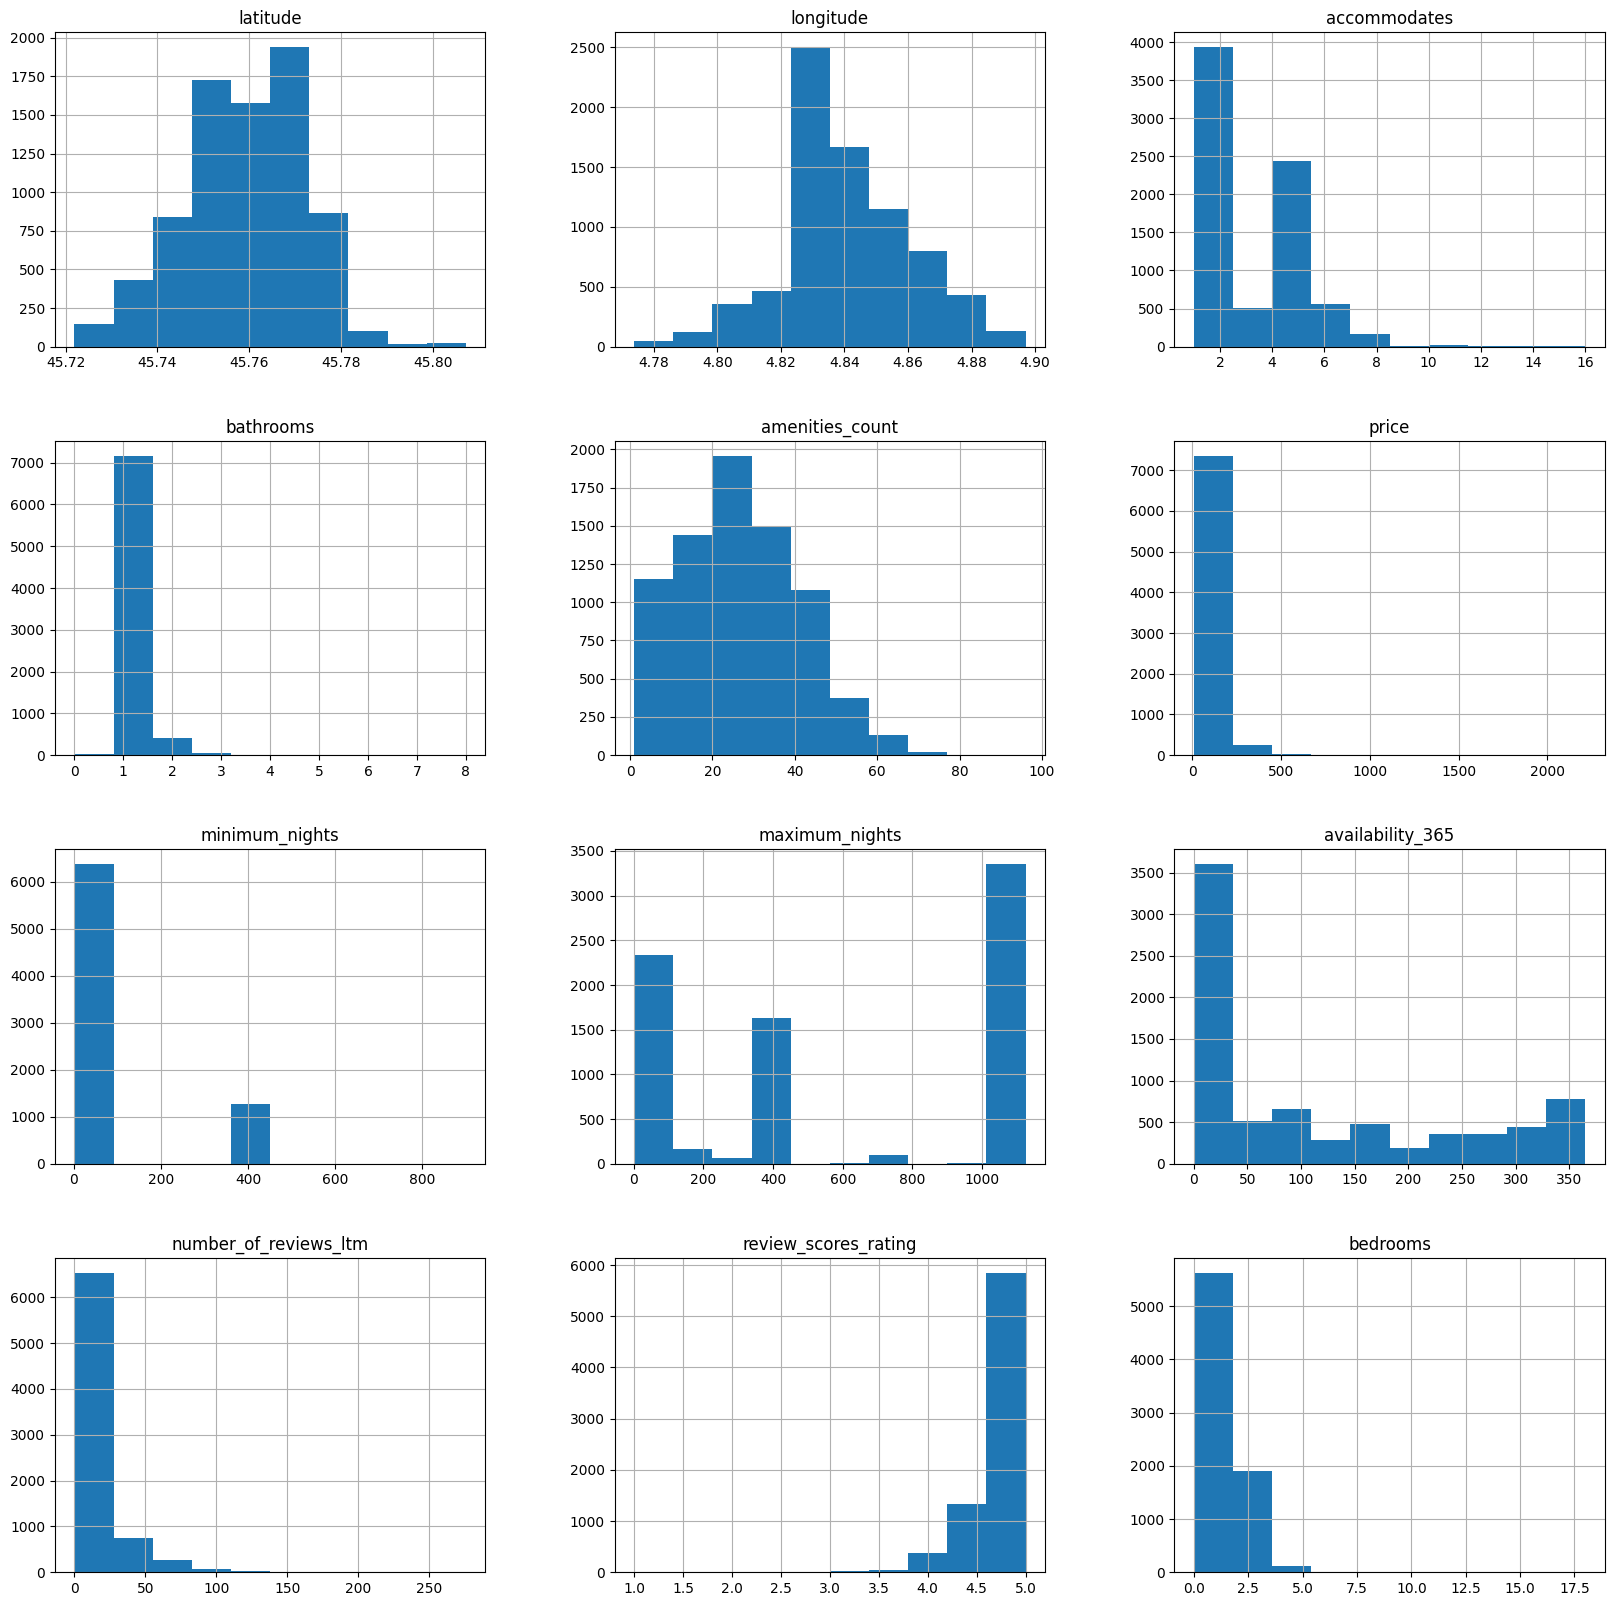

In [53]:
df_model.hist(figsize=(20, 20))

## Skewness

In [54]:
#Prueba Skewness
numeric_df_model = df_model.select_dtypes(include=[np.number])
skewed_features = numeric_df_model.apply(lambda x: x.skew()).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
skewness

,Skew
price,9.613111
bathrooms,6.294971
number_of_reviews_ltm,2.926124
bedrooms,2.709468
minimum_nights,1.808228
accommodates,1.707226
availability_365,0.774093
amenities_count,0.424983
longitude,0.089408
maximum_nights,0.038937


## Mapa de correlación

Mapa antes de hacer las transformaciones

<Axes: >

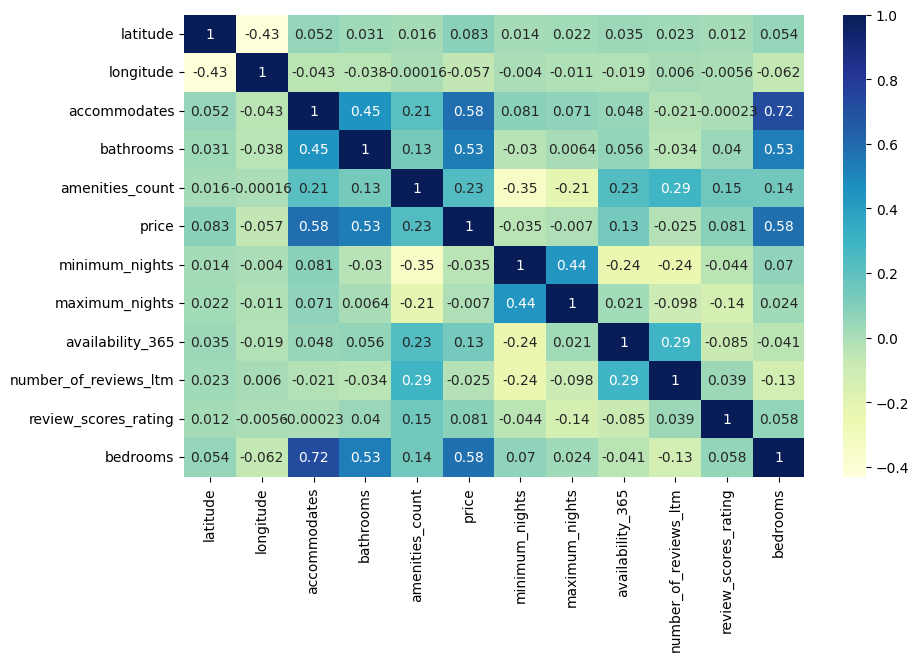

In [55]:
plt.figure(figsize=(10, 6))
numeric_df = df_model.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu")

En ese caso me dicido por realizar una transformación de box cox ya que algunas de las variables que incluiré en el modelo tienen asimetrías positivas y otras negativas

## Log transformation

For price

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\2599393111.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\2599393111.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_model['price'] , fit=stats.norm); #Distribución de precios



 mu = 92.99 and sigma = 80.91



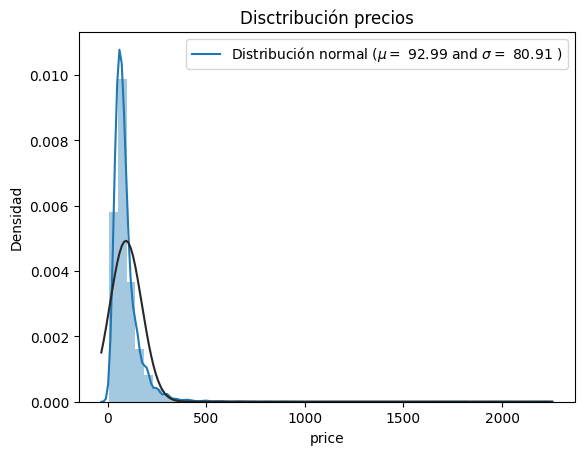

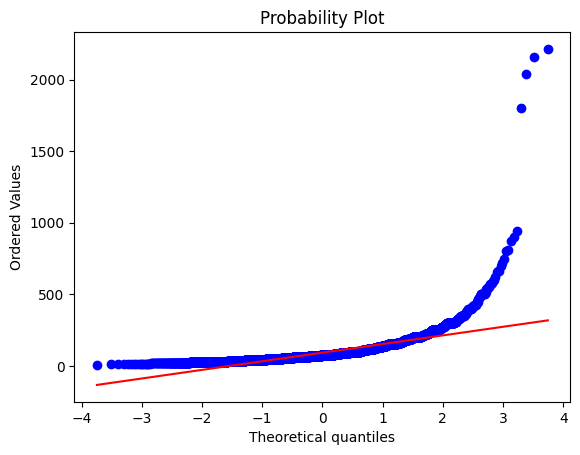

In [56]:
sns.distplot(df_model['price'] , fit=stats.norm); #Distribución de precios

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df_model['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')
plt.title('Disctribución precios')

#Mostramos QQ-plot
fig = plt.figure()
res = stats.probplot(df_model['price'], plot=plt)
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\2703941508.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\2703941508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["price"] = np.log1p(df_model["price"])
C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\2703941508.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (a


 mu = 4.36 and sigma = 0.57



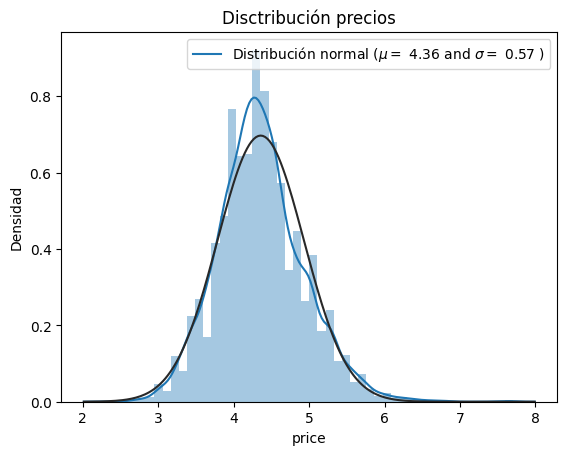

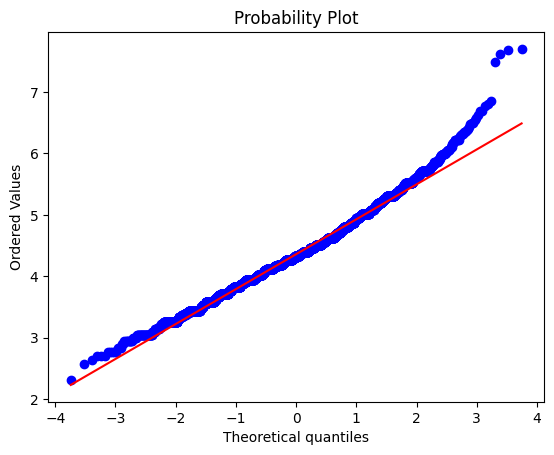

In [57]:
df_model["price"] = np.log1p(df_model["price"])
y_train = df_model["price"]

sns.distplot(df_model['price'] , fit=stats.norm); #Distribución de precios

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df_model['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')
plt.title('Disctribución precios')

#Mostramos QQ-plot
fig = plt.figure()
res = stats.probplot(df_model['price'], plot=plt)
plt.show()

Others features

In [58]:
df_model["bathrooms"] = np.log1p(df_model["bathrooms"] + 1)
df_model["accommodates"] = np.log1p(df_model["accommodates"])
df_model["bedrooms"] = np.log1p(df_model["bedrooms"])
df_model["number_of_reviews_ltm"] = np.log1p(df_model["number_of_reviews_ltm"])

C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\3079290438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["bathrooms"] = np.log1p(df_model["bathrooms"] + 1)
C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\3079290438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["accommodates"] = np.log1p(df_model["accommodates"])
C:\Users\Germán\AppData\Local\Temp\ipykernel_27152\3079290438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'amenities_count'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'maximum_nights'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>,
        <Axes: title={'center': 'review_scores_rating'}>,
        <Axes: title={'center': 'bedrooms'}>]], dtype=object)

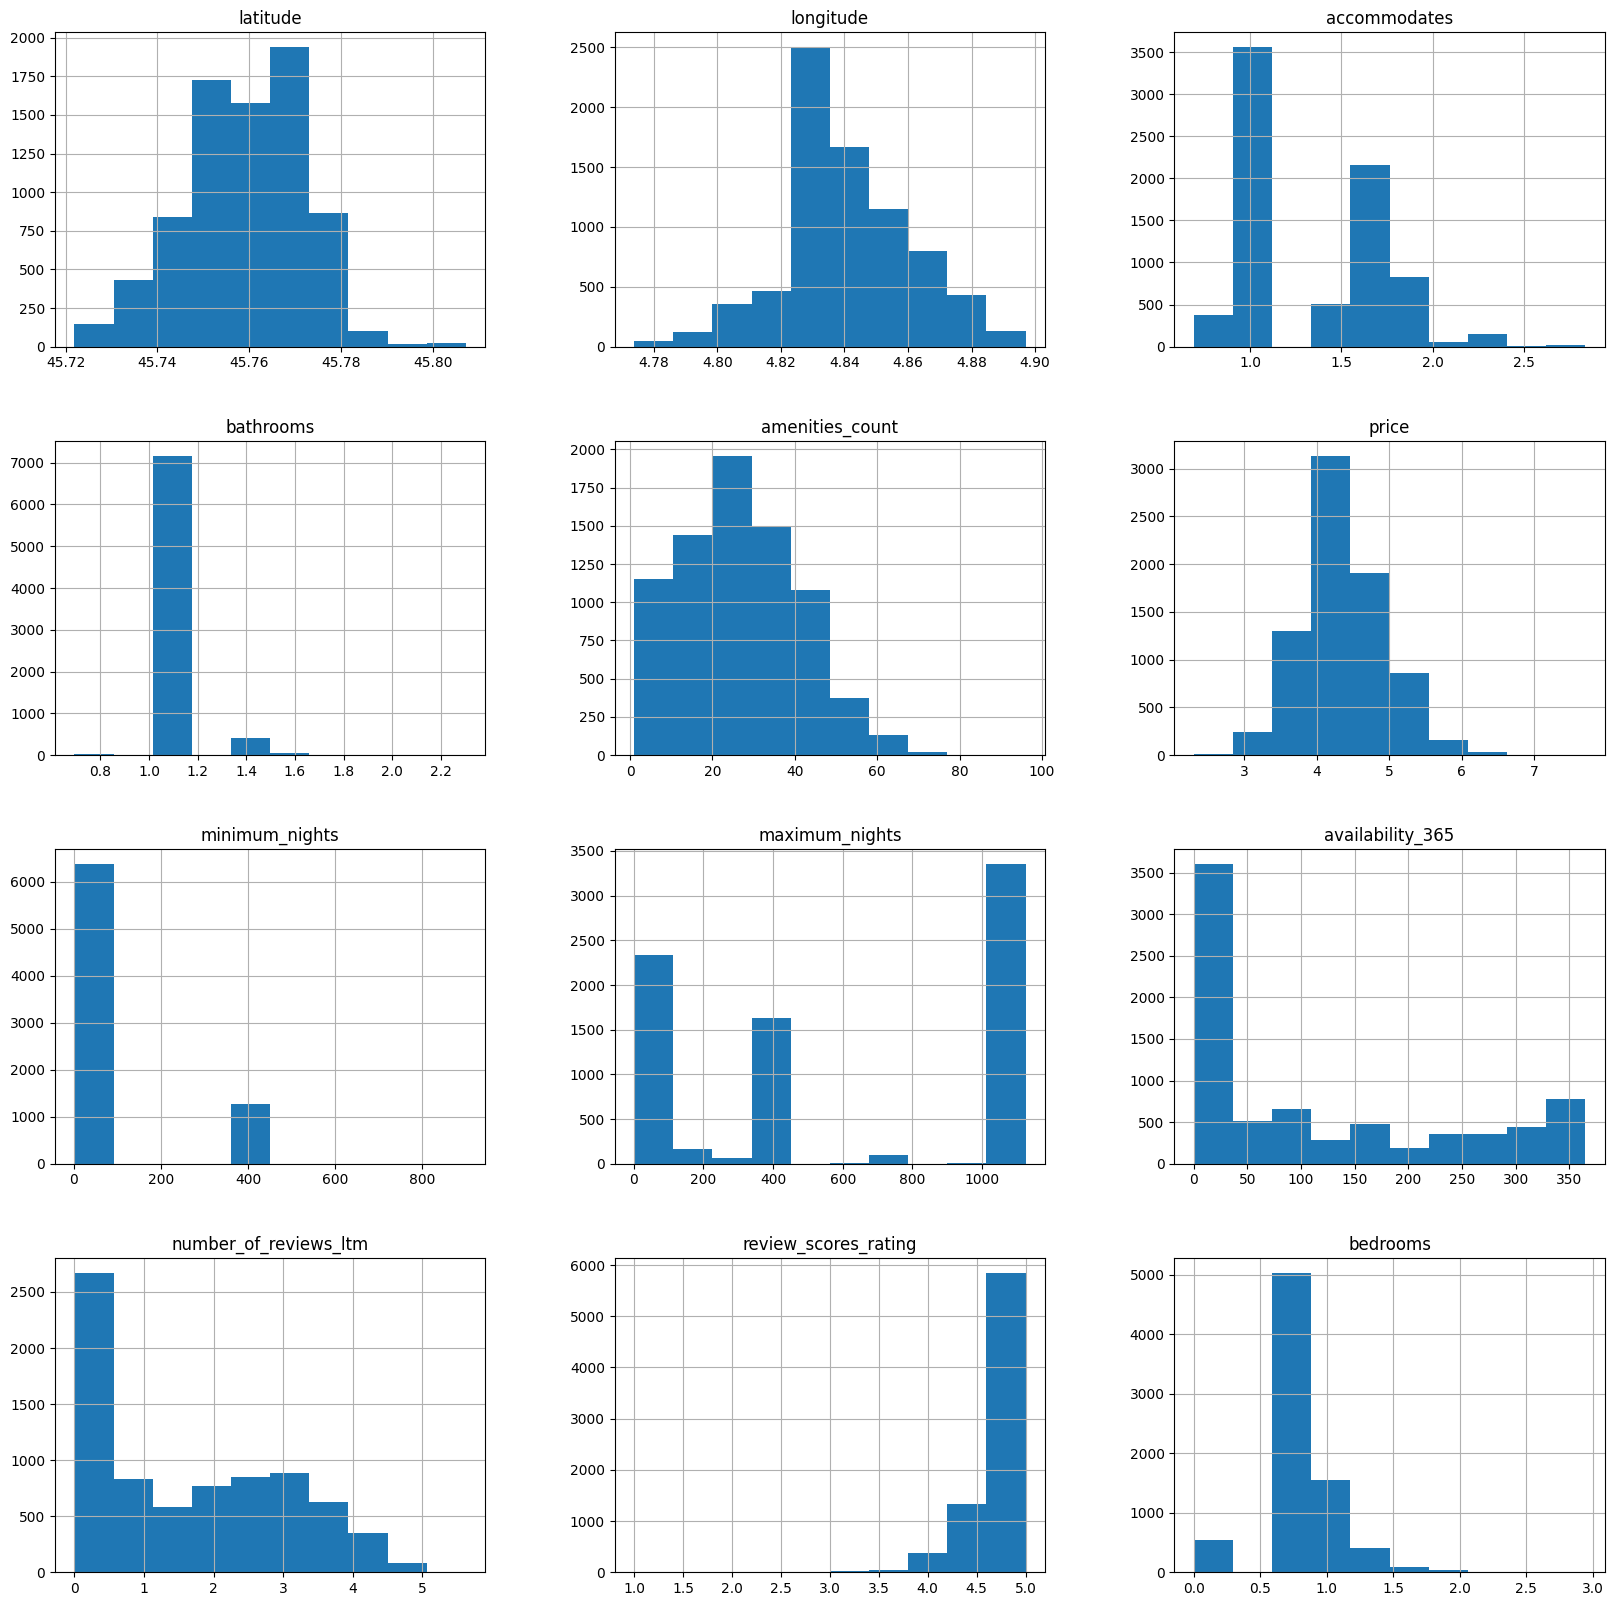

In [59]:
df_model.hist(figsize=(20, 20))

## Encoding

In [60]:
df_model = df_model.join(pd.get_dummies(df_model.host_is_superhost, dtype=int)).drop('host_is_superhost', axis=1)
df_model = df_model.join(pd.get_dummies(df_model.room_type, dtype=int)).drop('room_type', axis=1)
df_model = df_model.join(pd.get_dummies(df_model.license, dtype=int)).drop('license', axis=1)

In [61]:
df_model = df_model.rename(columns={"f": 'host_is_superhost_false'})
df_model = df_model.rename(columns={"t": 'host_is_superhost_true'})

In [62]:
df_model.head(1)

,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,amenities_count,price,minimum_nights,maximum_nights,availability_365,...,host_is_superhost_false,host_is_superhost_true,Entire home/apt,Hotel room,Private room,Shared room,Exempt,Mobility lease only,Unlicensed,licensed
0,5e Arrondissement,45.75673,4.81539,1.609438,1.098612,39,4.290459,3,180,309,...,1,0,1,0,0,0,0,0,0,1


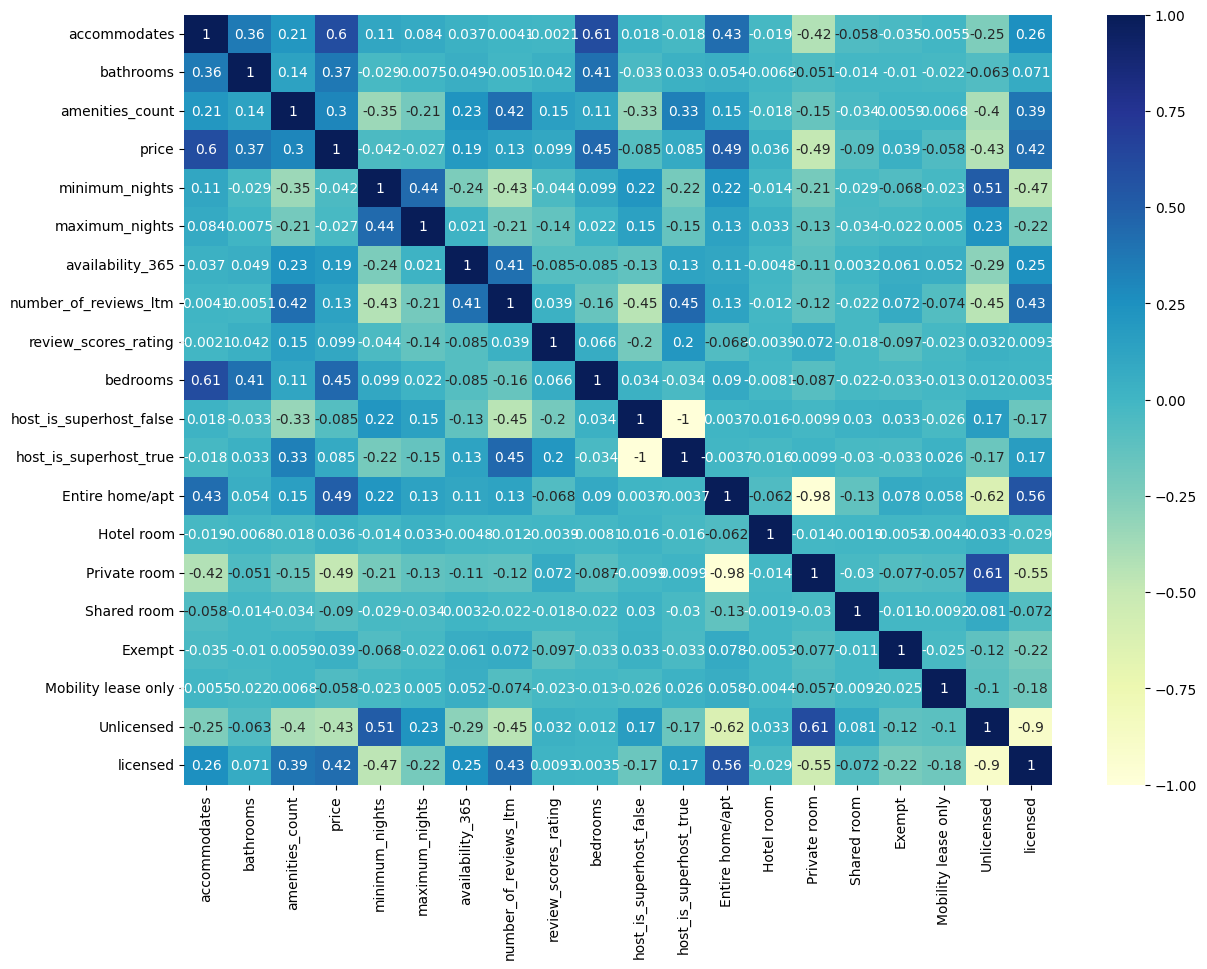

In [63]:
plt.figure(figsize=(14, 10))  
numeric_df = df_model.select_dtypes(include=[np.number]).drop(columns=['latitude', 'longitude'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 10})  
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

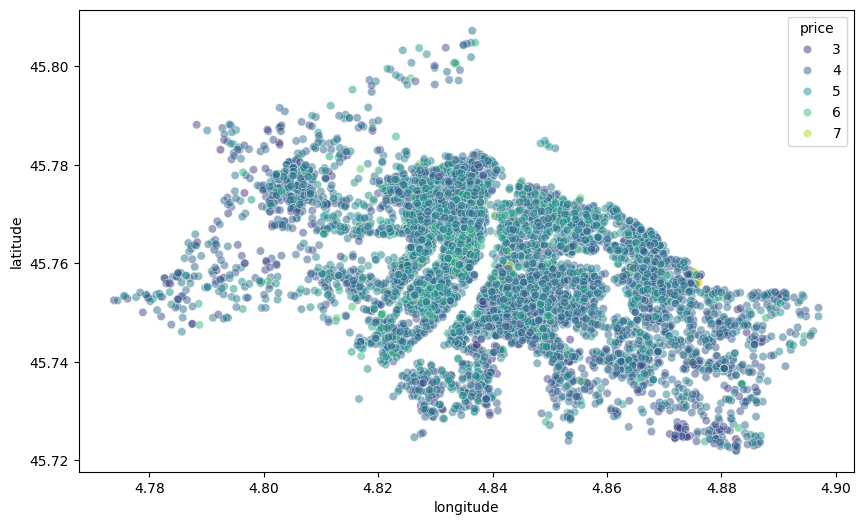

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x='longitude', y='latitude', hue='price', palette='viridis', alpha=0.5)

# Prediction Model

Random Forest

In [65]:
#Encodeamos neighbourhood_cleansed
df_model = df_model.join(pd.get_dummies(df_model.neighbourhood_cleansed, dtype=int)).drop('neighbourhood_cleansed', axis=1)

In [66]:
df_model = df_model.drop('latitude', axis=1)
df_model = df_model.drop('longitude', axis=1)

prueba

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df_model.drop('price', axis=1)
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)


RandomForestRegressor()

In [68]:
forest.score(X_test, y_test)

0.6142664312751029

In [69]:
from  sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': [10, 20, 30, 40, 50],
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

c:\Users\Germán\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [10, 20, 30, 40, 50],
                         'n_estimators': [100, 300, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
best_forest = grid_search.best_estimator_

In [71]:
best_forest.score(X_test, y_test)

0.6251842558524635

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

predictions = best_forest.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.26725794036751266
Root Mean Squared Error (RMSE): 0.3500829081343655


In [73]:
# Deshacer el logaritmo (expm1 es la inversa de log1p)
mae_original = np.expm1(mae)
rmse_original = np.expm1(rmse)

print(f"MAE en escala original: {mae_original:.2f}")
print(f"RMSE en escala original: {rmse_original:.2f}")

MAE en escala original: 0.31
RMSE en escala original: 0.42


In [74]:
df_model.columns

Index(['accommodates', 'bathrooms', 'amenities_count', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews_ltm', 'review_scores_rating', 'bedrooms',
       'host_is_superhost_false', 'host_is_superhost_true', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room', 'Exempt',
       'Mobility lease only', 'Unlicensed', 'licensed', '1er Arrondissement',
       '2e Arrondissement', '3e Arrondissement', '4e Arrondissement',
       '5e Arrondissement', '6e Arrondissement', '7e Arrondissement',
       '8e Arrondissement', '9e Arrondissement'],
      dtype='object')

In [75]:
df_model.head(1)

,accommodates,bathrooms,amenities_count,price,minimum_nights,maximum_nights,availability_365,number_of_reviews_ltm,review_scores_rating,bedrooms,...,licensed,1er Arrondissement,2e Arrondissement,3e Arrondissement,4e Arrondissement,5e Arrondissement,6e Arrondissement,7e Arrondissement,8e Arrondissement,9e Arrondissement
0,1.609438,1.098612,39,4.290459,3,180,309,0.0,4.76,1.098612,...,1,0,0,0,0,1,0,0,0,0


In [76]:
# Creamos un nuevo DataFrame con las características de la nueva publicación
nueva_publicacion = pd.DataFrame({
    'accommodates': [2],
    'bathrooms': [3],
    'amenities_count': [40],
    'minimum_nights': [2],
    'maximum_nights': [30],
    'availability_365': [365],
    'number_of_reviews_ltm': [0],
    'review_scores_rating': [4.5],
    'bedrooms': [1],
    'host_is_superhost_false': [1],
    'host_is_superhost_true': [0],
    'Entire home/apt': [1],
    'Hotel room': [0],
    'Private room': [0],
    'Shared room': [0],
    'Exempt': [0],
    'Mobility lease only': [0],
    'Unlicensed': [0],
    'licensed': [1],
    '1er Arrondissement' : [0],
    '2e Arrondissement' : [1],
    '3e Arrondissement' : [0],
    '4e Arrondissement' : [0],
    '5e Arrondissement' : [0],
    '6e Arrondissement' : [0],
    '7e Arrondissement' : [0],
    '8e Arrondissement' : [0],
    '9e Arrondissement' : [0],

})

# Predecir el precio usando el modelo entrenado
prediccion_precio = best_forest.predict(nueva_publicacion)

# Deshacer la transformación logarítmica para obtener el precio en la escala original
precio_original = np.expm1(prediccion_precio)

print(f"El precio estimado para la nueva publicación es: ${precio_original[0]:.2f}")

El precio estimado para la nueva publicación es: $160.67


In [77]:
#Exportamos modelo
import joblib

joblib.dump(best_forest, r"C:\Users\Germán\Github\Project_Airbnb\Data\random_forest_model.pkl")

['C:\\Users\\Germán\\Github\\Project_Airbnb\\Data\\random_forest_model.pkl']

In [ ]:
#Exportamos df_model
df_model.to_csv(r"C:\Users\Germán\Github\Project_Airbnb\Data\df_model.csv", index=False)